In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/Research/NYU/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot

pip install 'aif360[LawSchoolGPA]'
2024-01-08 14:30:37.852479: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 14:30:37.891899: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 14:30:37.893042: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-08 14:30:38.782298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = '1ec0d32c-259d-4717-8533-a09566a33d53'
SENSITIVE_ATTRS = ['sex']
SENSITIVE_ATTR_FOR_INTERVENTION = 'sex'
MODEL_NAMES = ['AdversarialDebiasing']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(19, 21)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.907975,0.925532,1.000000,0.000000,0.884058,1.000000,0.000000,0
1,Aleatoric_Uncertainty,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.151380,0.134395,0.105832,0.489387,0.174519,0.144735,0.401624,0
2,Epistemic_Uncertainty,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.090674,0.070805,0.052911,0.293202,0.117741,0.090699,0.323934,0
3,F1,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.946619,0.958580,1.000000,0.000000,0.928571,1.000000,0.000000,0
4,FNR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.029197,0.024096,0.000000,1.000000,0.037037,0.000000,1.000000,0
5,FPR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.423077,0.454545,0.000000,1.000000,0.400000,0.000000,1.000000,0
6,IQR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.103471,0.081040,0.057627,0.372035,0.134029,0.101925,0.378817,0
7,Jitter,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.090507,0.070269,0.048215,0.344361,0.118078,0.092407,0.313816,0
8,Label_Stability,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.871779,0.901064,0.932184,0.514286,0.831884,0.873770,0.512500,0
9,Mean_Prediction,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 12:25:32.523,1ec0d32c-259d-4717-8533-a09566a33d53,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.126881,0.112538,0.085758,0.445380,0.146420,0.128063,0.286390,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

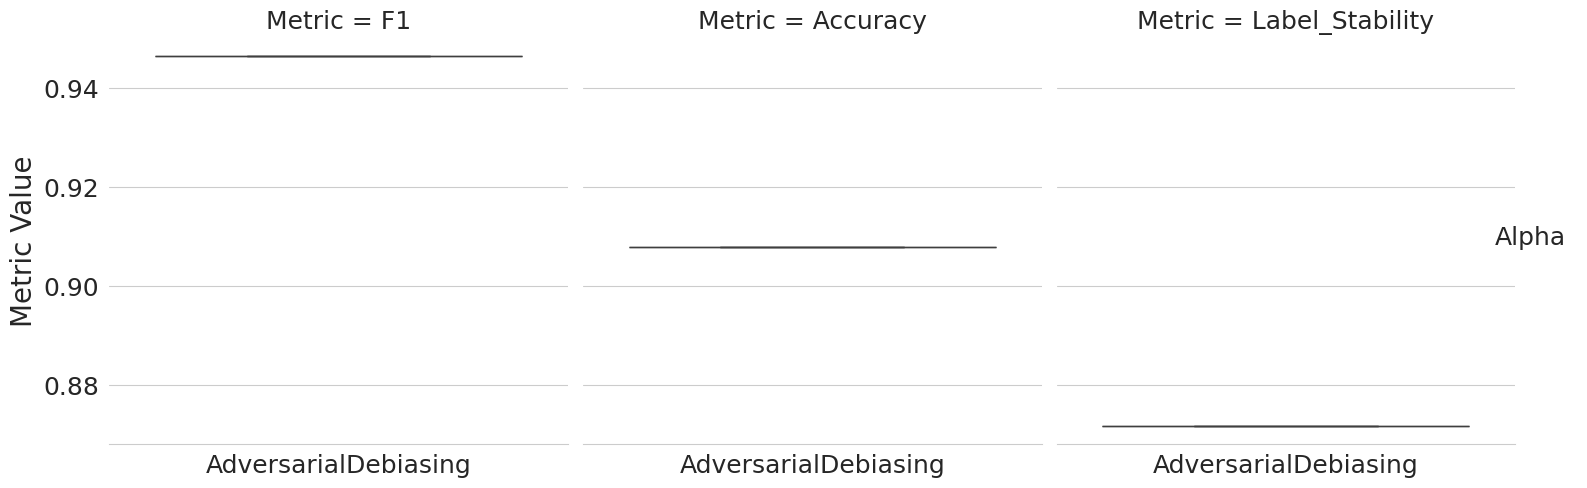

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

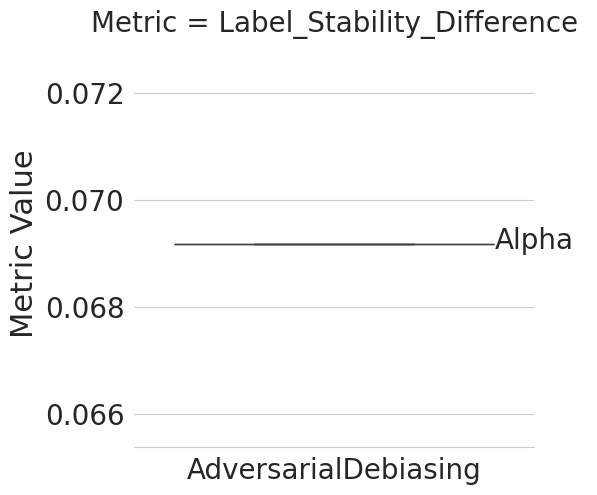

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

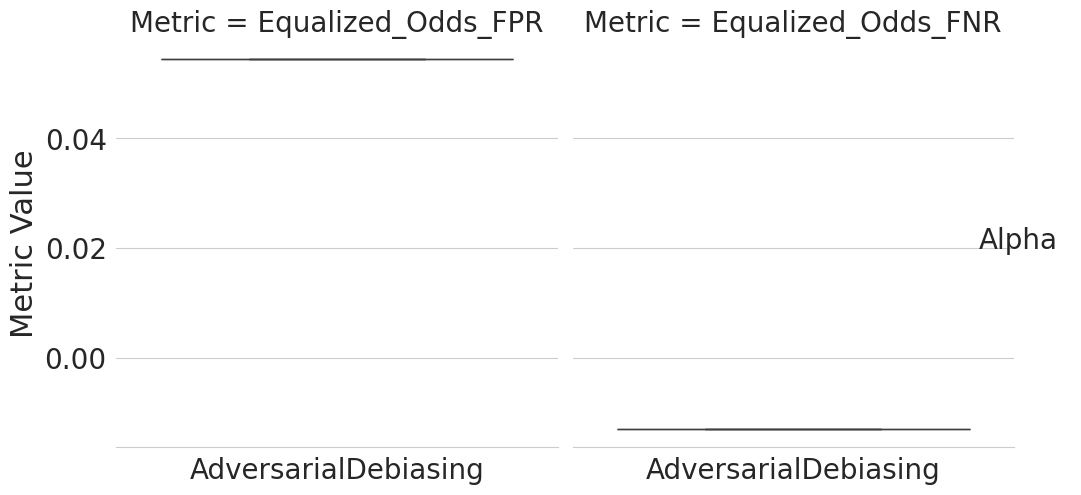

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

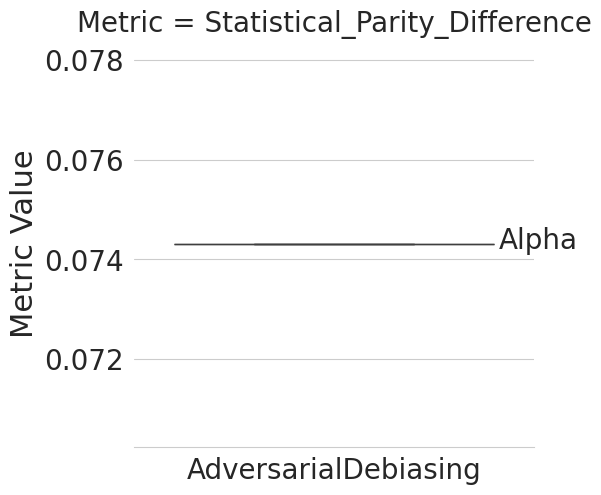

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)